In [93]:
import pandas as pd
import os
import matplotlib.pyplot as plt


In [94]:
# Load the data into a pandas DataFrame
print(os.getcwd())
df = pd.read_csv(
    filepath_or_buffer=os.getcwd()+'/../../data/monks/monks-3.train',
    names=['target', 'col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'id'],
    delimiter=' '
)

# Display the loaded data
df

/Users/gianlucapanzani/Documents/GitHub/Machine_Learning_Project/frameworks/tfkeras


,target,col1,col2,col3,col4,col5,col6,id
NaN,1,1,1,1,1,1,2,data_2
NaN,1,1,1,1,1,2,1,data_3
NaN,1,1,1,1,1,2,2,data_4
NaN,0,1,1,1,1,3,1,data_5
NaN,0,1,1,1,1,4,1,data_7
...,...,...,...,...,...,...,...,...
NaN,0,3,3,2,2,2,2,data_420
NaN,0,3,3,2,2,3,2,data_422
NaN,0,3,3,2,3,1,1,data_425
NaN,0,3,3,2,3,3,2,data_430


In [95]:
# Initializing labels/targets vector
y = df['target'].values.astype(float)

# Drop of the IDs and the targets
df = df.drop(columns=['target','id'], axis=1)

# Initializing the one-hot DataFrame
df_copy = df.copy(deep=True)

# Iteration on the columns of the DataFrame
for column in df.columns:

    # Creation of the one-hot encoding's columns
    df_one_hot = pd.get_dummies(df[column], dtype=float)

    # Change the name of the columns
    df_one_hot = df_one_hot.set_axis([column+'_'+str(col) for col in df_one_hot.columns], axis=1)

    # Drop of the initial column
    df_copy.drop(labels=column, axis=1, inplace=True)

    # Concatenation of the new columns to the DataFrame
    df_copy = pd.concat([df_copy,df_one_hot], axis=1)

# Print of the obtained DataFrame   col1_2	col1_3	 col2_2	col2_3  col3_2	col3_3  col4_2	col4_3	col5_2	col5_3 col6_2		
df_copy

,col1_1,col1_2,col1_3,col2_1,col2_2,col2_3,col3_1,col3_2,col4_1,col4_2,col4_3,col5_1,col5_2,col5_3,col5_4,col6_1,col6_2
NaN,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
NaN,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
NaN,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
NaN,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
NaN,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
NaN,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
NaN,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
NaN,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


# Grid Search

In [96]:
# Parameters' space for Grid Search
param_space = {
    'input_units': [17],
    'units': [3, 4],
    'optimizer': ['sgd'],
    'learning_rate': [i for i in range(0,100,5)] + [999, 9999], #[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99, 0.999],
    'batch_size': [10, 15, 30, 60],
    'epochs': [390],
    'weight_decay': [i for i in range(0,100,5)] + ['01', '001'], #[0.001, 0.003, 0.005, 0.007, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06],
    'momentum': [i for i in range(50,90,5)], #[0.5, 0.6, 0.7, 0.8],
    'activation': ['tanh', 'relu'],
    'output_activation': ['sigmoid'],
    'metrics': ['accuracy']
}
# MONK 3:
# TS acc = 0.967 {'input_units': 17, 'units': 4, 'optimizer': 'sgd', 'learning_rate': 0.4, 'batch_size': 30, 'epochs': 390, 'weight_decay': 0.001, 'momentum': 0.6, 'activation': 'relu', 'output_activation': 'sigmoid', 'metrics': 'accuracy'}
# TS acc = 0.946 {'input_units': 17, 'units': 3, 'optimizer': 'sgd', 'learning_rate': 0.3, 'batch_size': 15, 'epochs': 390, 'weight_decay': 0.01, 'momentum': 0.8, 'activation': 'relu', 'output_activation': 'sigmoid', 'metrics': 'accuracy'}
# TS acc = 0.949 {'input_units': 17, 'units': 3, 'optimizer': 'sgd', 'learning_rate': 0.2, 'batch_size': 15, 'epochs': 390, 'weight_decay': 0.005, 'momentum': 0.8, 'activation': 'relu', 'output_activation': 'sigmoid', 'metrics': 'accuracy'}
# TS acc = 
# MONK 2:
# TS acc = 1.000 {'input_units': 17, 'units': 4, 'optimizer': 'sgd', 'learning_rate': 0.5, 'batch_size': 30, 'epochs': 390, 'weight_decay': 0.02, 'momentum': 0.8, 'activation': 'tanh', 'output_activation': 'sigmoid', 'metrics': 'accuracy'}
# TS acc = 1.000 {'input_units': 17, 'units': 3, 'optimizer': 'sgd', 'learning_rate': 0.5, 'batch_size': 30, 'epochs': 390, 'weight_decay': 0.03, 'momentum': 0.6, 'activation': 'tanh', 'output_activation': 'sigmoid', 'metrics': 'accuracy'}
# MONK 1:
# TS acc = 1.000 {'input_units': 17, 'units': 4, 'optimizer': 'sgd', 'learning_rate': 0.3, 'batch_size': 15, 'epochs': 390, 'weight_decay': 0.02, 'momentum': 0.5, 'activation': 'tanh', 'output_activation': 'sigmoid', 'metrics': 'accuracy'}
# TS acc = 0.991 {'input_units': 17, 'units': 4, 'optimizer': 'sgd', 'learning_rate': 0.4, 'batch_size': 15, 'epochs': 390, 'weight_decay': 0.05, 'momentum': 0.5, 'activation': 'relu', 'output_activation': 'sigmoid', 'metrics': 'accuracy'}

# Model Selection

## K-fold Cross Validation 

In [97]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras.callbacks import EarlyStopping

# Assigning new DataFrame to Data set variable
X = df_copy.values

# Number of trials with random combinations
num_trials = 50

# K-fold Cross-validation
k = 5
kfold = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Lists to store training and validation accuracies
trials_training_accuracies = []
trials_validation_accuracies = []

# Lists to store best hyperparameters
best_hyperparameters = {
    'trial': 0,
    'params': {},
    'mean_training_accuracy': 0, 
    'mean_validation_accuracy': 0
}

# For each iteration we choose the hyperparameters (randomly) and we use them with K-fold CV
for i in range(num_trials):
    
    # Random parameters
    params = {
        'input_units': np.random.choice(param_space['input_units']),
        'units': np.random.choice(param_space['units']),
        'optimizer': np.random.choice(param_space['optimizer']),
        'learning_rate': float(
            '0.'+str(np.random.choice(param_space['learning_rate']))
        )+0.0001,
        #'learning_rate': np.random.choice(param_space['learning_rate']),
        'batch_size': np.random.choice(param_space['batch_size']),
        'epochs': np.random.choice(param_space['epochs']),
        'weight_decay': float(
            '0.0'+str(np.random.choice(param_space['weight_decay']))
        )+0.0001,
        #'weight_decay': np.random.choice(param_space['weight_decay']),
        'momentum': float(
            '0.'+str(np.random.choice(param_space['momentum']))
        ),
        #'momentum': np.random.choice(param_space['momentum']),
        'activation': np.random.choice(param_space['activation']),
        'output_activation': np.random.choice(param_space['output_activation']),
        'metrics': np.random.choice(param_space['metrics']),
    }

    # Lists to store fold-wise accuracies
    fold_training_accuracies = []
    fold_validation_accuracies = []

    # For each K-fold returns the indexes of the data splitted in: <X_train,y_train> and <X_val,y_val>
    for train_index, val_index in kfold.split(X, y):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        # Build the model
        model = Sequential()
        model.add(Dense(units=params['input_units'], activation=params['activation'], use_bias=True))
        model.add(Dense(units=params['units'], activation=params['activation'], use_bias=True))
        model.add(Dense(units=1, activation=params['output_activation'], use_bias=True))

        # Set the optimizer with the sampled learning rate
        opt = optimizers.legacy.SGD(learning_rate=params['learning_rate'], momentum=params['momentum'])

        # Sets the Loss Function, the Optimizer used in the model, and the Metrics used for evaluation
        model.compile(loss='binary_crossentropy', optimizer=opt, metrics=[params['metrics']])

        # Set the Early Stopping for the model
        early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

        # Training of the model with validation split and early stopping
        history = model.fit(
            x=X_train,
            y=y_train,
            epochs=params['epochs'],
            batch_size=params['batch_size'],
            validation_data=(X_val, y_val),
            callbacks=[early_stopping],  # Add early stopping callback
            verbose=0
        )

        # Evaluate on both training and validation sets
        training_loss, training_accuracy     = model.evaluate(X_train, y_train, verbose=0)
        validation_loss, validation_accuracy = model.evaluate(X_val, y_val, verbose=0)

        # Add the TR accuracy and VL accuracy to the lists (to compute the mean)
        fold_training_accuracies.append(training_accuracy)
        fold_validation_accuracies.append(validation_accuracy)

    # Calculate the Mean of the Accuracies (for this trial)
    mean_training_accuracy_i = np.mean(fold_training_accuracies)
    mean_validation_accuracy_i = np.mean(fold_validation_accuracies)

    # Store the Mean of the Accuracies for each Trail
    trials_training_accuracies.append(mean_training_accuracy_i)
    trials_validation_accuracies.append(mean_validation_accuracy_i)

    # Print mean accuracies and hyperparameters for this trial
    print(f"Trial {i+1}: Mean Training Accuracy={mean_training_accuracy_i:.4f}, Mean Validation Accuracy={mean_validation_accuracy_i:.4f}")
    print("Hyperparameters:", params)

    # Update best hyperparameters if current trial has higher validation accuracy
    if mean_validation_accuracy_i > best_hyperparameters['mean_validation_accuracy']:
        best_hyperparameters['trial'] = i + 1
        best_hyperparameters['params'] = params
        best_hyperparameters['mean_training_accuracy'] = mean_training_accuracy_i
        best_hyperparameters['mean_validation_accuracy'] = mean_validation_accuracy_i
    
    # Case of best Hyperparameters already found
    if best_hyperparameters['mean_validation_accuracy'] == 1 and best_hyperparameters['mean_training_accuracy'] == 1:
        break

# Print best hyperparameters
print("\nBest Hyperparameters:")
print("Trial:", best_hyperparameters['trial'])
print("Hyperparameters:", best_hyperparameters['params'])
print("Mean Training Accuracy:", best_hyperparameters['mean_training_accuracy'])
print("Mean Validation Accuracy:", best_hyperparameters['mean_validation_accuracy'])


Trial 1: Mean Training Accuracy=0.9447, Mean Validation Accuracy=0.9260
Hyperparameters: {'input_units': 17, 'units': 3, 'optimizer': 'sgd', 'learning_rate': 0.4501, 'batch_size': 60, 'epochs': 390, 'weight_decay': 0.0901, 'momentum': 0.85, 'activation': 'tanh', 'output_activation': 'sigmoid', 'metrics': 'accuracy'}
Trial 2: Mean Training Accuracy=0.9405, Mean Validation Accuracy=0.9177
Hyperparameters: {'input_units': 17, 'units': 3, 'optimizer': 'sgd', 'learning_rate': 0.8001, 'batch_size': 60, 'epochs': 390, 'weight_decay': 0.035100000000000006, 'momentum': 0.8, 'activation': 'tanh', 'output_activation': 'sigmoid', 'metrics': 'accuracy'}
Trial 3: Mean Training Accuracy=0.9529, Mean Validation Accuracy=0.9260
Hyperparameters: {'input_units': 17, 'units': 4, 'optimizer': 'sgd', 'learning_rate': 0.7001, 'batch_size': 30, 'epochs': 390, 'weight_decay': 0.0002, 'momentum': 0.6, 'activation': 'relu', 'output_activation': 'sigmoid', 'metrics': 'accuracy'}
Trial 4: Mean Training Accuracy=0.

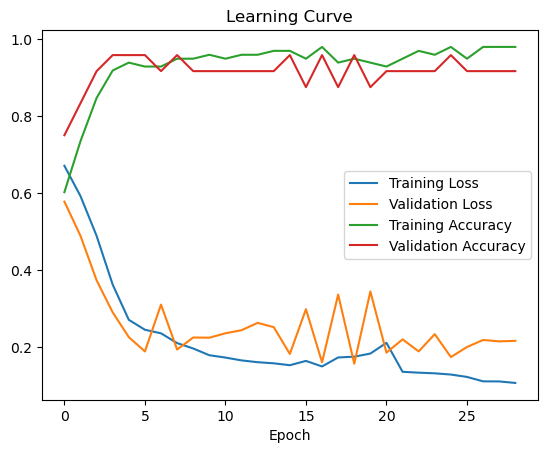

In [98]:
# Plot the learning curve
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Learning Curve')
plt.xlabel('Epoch')
plt.legend()


In [99]:
# Print the best Hyperparameters selected
print(f"Hyperparameters selected: {best_hyperparameters['params']}")

# Best parameters
params = {
    'input_units': best_hyperparameters['params']['input_units'],
    'units': best_hyperparameters['params']['units'],
    'optimizer': best_hyperparameters['params']['optimizer'],
    'learning_rate': best_hyperparameters['params']['learning_rate'],
    'batch_size': best_hyperparameters['params']['batch_size'],
    'epochs': best_hyperparameters['params']['epochs'],
    'weight_decay': best_hyperparameters['params']['weight_decay'],
    'momentum': best_hyperparameters['params']['momentum'],
    'activation': best_hyperparameters['params']['activation'],
    'metrics': best_hyperparameters['params']['metrics']
}

# Build the model
model = Sequential()
model.add(Dense(units=params['input_units'], activation=params['activation'], use_bias=True))
model.add(Dense(units=params['units'], activation=params['activation'], use_bias=True))
model.add(Dense(units=1, activation='sigmoid', use_bias=True))

# Set the optimizer with the sampled learning rate
opt = optimizers.legacy.SGD(learning_rate=params['learning_rate'], momentum=params['momentum'])

# Sets the Loss Function, the Optimizer used in the model, and the Metrics used for evaluation
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=[params['metrics']])

# Set the Early Stopping for the model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# For each K-fold returns the indexes of the data splitted in: <X_train,y_train> and <X_val,y_val>
for train_index, val_index in kfold.split(X, y):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Training of the model with validation split and early stopping
    history = model.fit(
        x=X_train,
        y=y_train,
        epochs=params['epochs'],
        batch_size=params['batch_size'],
        validation_data=(X_val, y_val),
        callbacks=[early_stopping],  # Add early stopping callback
        verbose=0
    )


Hyperparameters selected: {'input_units': 17, 'units': 3, 'optimizer': 'sgd', 'learning_rate': 0.7001, 'batch_size': 10, 'epochs': 390, 'weight_decay': 0.0751, 'momentum': 0.55, 'activation': 'relu', 'output_activation': 'sigmoid', 'metrics': 'accuracy'}


# Test Phase

In [100]:
# Load the Test set into a pandas DataFrame
print(os.getcwd())
df_test = pd.read_csv(
    filepath_or_buffer=os.getcwd()+'/../../data/monks/monks-3.test',
    names=['target', 'col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'id'],
    delimiter=' '
)

# Display the loaded data
df_test.head

/Users/gianlucapanzani/Documents/GitHub/Machine_Learning_Project/frameworks/tfkeras


<bound method NDFrame.head of      target  col1  col2  col3  col4  col5  col6        id
NaN       1     1     1     1     1     1     1    data_1
NaN       1     1     1     1     1     1     2    data_2
NaN       1     1     1     1     1     2     1    data_3
NaN       1     1     1     1     1     2     2    data_4
NaN       1     1     1     1     1     3     1    data_5
..      ...   ...   ...   ...   ...   ...   ...       ...
NaN       0     3     3     2     3     2     2  data_428
NaN       0     3     3     2     3     3     1  data_429
NaN       0     3     3     2     3     3     2  data_430
NaN       0     3     3     2     3     4     1  data_431
NaN       0     3     3     2     3     4     2  data_432

[432 rows x 8 columns]>

In [101]:
# Initializing labels/targets vector
y_test = df_test['target'].values.astype(float)

# Drop of the IDs and the targets
df_test = df_test.drop(columns=['target','id'], axis=1)

# Initializing the one-hot DataFrame
df_copy_test = df_test.copy(deep=True)

# Iteration on the columns of the DataFrame
for column in df_test.columns:

    # Creation of the one-hot encoding's columns
    df_one_hot = pd.get_dummies(df_test[column], dtype=float)

    # Change the name of the columns
    df_one_hot = df_one_hot.set_axis([column+'_'+str(col) for col in df_one_hot.columns], axis=1)

    # Drop of the initial column
    df_copy_test.drop(labels=column, axis=1, inplace=True)

    # Concatenation of the new columns to the DataFrame
    df_copy_test = pd.concat([df_copy_test,df_one_hot], axis=1)

# Print of the obtained DataFrame
df_copy_test

,col1_1,col1_2,col1_3,col2_1,col2_2,col2_3,col3_1,col3_2,col4_1,col4_2,col4_3,col5_1,col5_2,col5_3,col5_4,col6_1,col6_2
NaN,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
NaN,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
NaN,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
NaN,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
NaN,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
NaN,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
NaN,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
NaN,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


## Test of the Model

In [102]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import fbeta_score

# Assigning new DataFrame to Data set variable
X_test = df_copy_test

# Evaluate the Model on TS set
testing_loss, testing_accuracy = model.evaluate(
    x=X_test,
    y=y_test,
    batch_size=best_hyperparameters['params']['batch_size'],
    verbose=0
)

# Predictions of the Model on TS set
y_predictions_probability = model.predict(
    x=X_test,
    batch_size=best_hyperparameters['params']['batch_size'],
    verbose=0
)

# Converting the Probabilities into Categorized values
y_predictions = [round(prediction[0]) for prediction in y_predictions_probability]

# Compute the f1-score and f2-score
f1_score = fbeta_score(y_true=y_test, y_pred=y_predictions, beta=1)
f2_score = fbeta_score(y_true=y_test, y_pred=y_predictions, beta=2)

# Print Test accuracy and Predictions accuracy
print(f"Test Accuracy={testing_accuracy:.4f}")
print(f"f1-score={f1_score:.4f}")
print(f"f2-score={f2_score:.4f}")

# Compute the Confusion Matrix (alternative: tn, fp, fn, tp = confusion_matrix(y_true=y_test, y_pred=y_predictions).ravel())
confusion = confusion_matrix(y_true=y_test, y_pred=y_predictions)
df_confusion = pd.DataFrame(
    data=confusion,
    index=['Real_Class_0', 'Real_Class_1'],
    columns=['Predicted_Class_0', 'Predicted_Class_1']
)
df_confusion


Test Accuracy=0.9468
f1-score=0.9474
f2-score=0.9233


,Predicted_Class_0,Predicted_Class_1
Real_Class_0,202,2
Real_Class_1,21,207
